I have chosen this particular dataset because I find it more relatable.

In [1]:
# ================
# Nightmare Dataset Analysis
# ================================

# 1️. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [12]:
file_path = r"C:\Users\Vanisa\Downloads\nightmare_dataset.csv"


In [14]:
# 2️. Load Dataset
file_path = r"C:\Users\Vanisa\Downloads\nightmare_dataset.csv"
df = pd.read_csv(file_path)
# Preview data
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns)
df.head()

Shape of dataset: (20000, 12)

Column names: Index(['Age', 'Gender', 'Nightmare Frequency', 'Nightmare Content',
       'Sleep Patterns', 'Recent Life Changes', 'Sleep Environment',
       'Parental Observations', 'Psychological Problems at School',
       'Has Recent Life Changes', 'Irregular Sleep Pattern',
       'Fear-Related Nightmare'],
      dtype='object')


,Age,Gender,Nightmare Frequency,Nightmare Content,Sleep Patterns,Recent Life Changes,Sleep Environment,Parental Observations,Psychological Problems at School,Has Recent Life Changes,Irregular Sleep Pattern,Fear-Related Nightmare
0,4.0,Female,Weekly,Being Chased,Consistent sleep,No recent changes,Curtains blowing,Alone and Lost,28.0,0,0,1
1,10.0,Male,NaN,Darkness Fears,Consistent sleep,Academic pressure,Shared room,Animals attacking,12.0,1,0,1
2,NaN,Female,Weekly,Water Drowning,Irregular sleep,Started daycare,Window open,bedwetting,29.0,1,1,0
3,NaN,Male,Weekly,Scary Place Fear,Irregular sleep,Recent move to new house,NaN,Being Chased,17.0,1,1,1
4,10.0,Male,NaN,Unknown,Irregular sleep,Academic pressure,Creaking floor,Falling from Height,21.0,1,1,0


In [15]:
# 3️. Data Info & Missing Values
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Data types:
 Age                                 float64
Gender                               object
Nightmare Frequency                  object
Nightmare Content                    object
Sleep Patterns                       object
Recent Life Changes                  object
Sleep Environment                    object
Parental Observations                object
Psychological Problems at School    float64
Has Recent Life Changes               int64
Irregular Sleep Pattern               int64
Fear-Related Nightmare                int64
dtype: object

Missing values:
 Age                                 1904
Gender                              2000
Nightmare Frequency                 2000
Nightmare Content                      0
Sleep Patterns                      2000
Recent Life Changes                 2000
Sleep Environment                   2000
Parental Observations               2000
Psychological Problems at School    2000
Has Recent Life Changes                0
Irregular Sleep 

In [18]:
# 4️ Data Cleaning
# Convert categorical binary columns to 0/1 integers if needed
binary_cols = ['Has Recent Life Changes', 'Irregular Sleep Pattern', 'Fear-Related Nightmare']
for col in binary_cols:
    df[col] = df[col].astype(int)
# Ensure numeric columns are correct type
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Psychological Problems at School'] = pd.to_numeric(df['Psychological Problems at School'], errors='coerce')

# Drop rows with critical missing values (optional)
df.dropna(subset=['Age', 'Gender', 'Nightmare Frequency', 'Psychological Problems at School'], inplace=True)

# Fill missing categorical values with "Unknown"
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

print("\nCleaned dataset shape:", df.shape)



Cleaned dataset shape: (13207, 12)


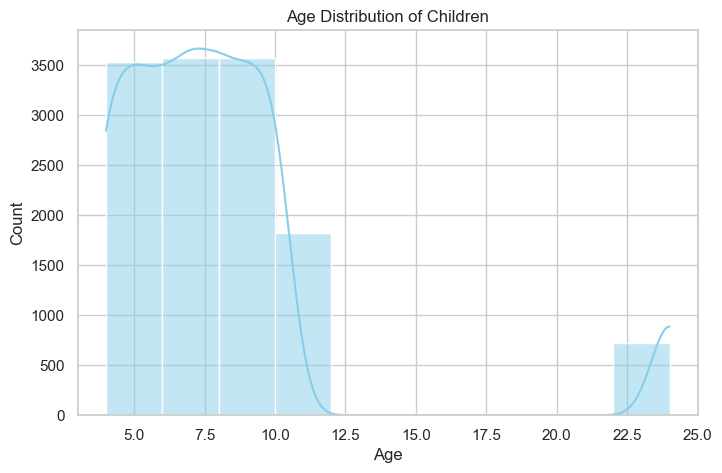

C:\Users\Vanisa\AppData\Local\Temp\ipykernel_24672\540144590.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


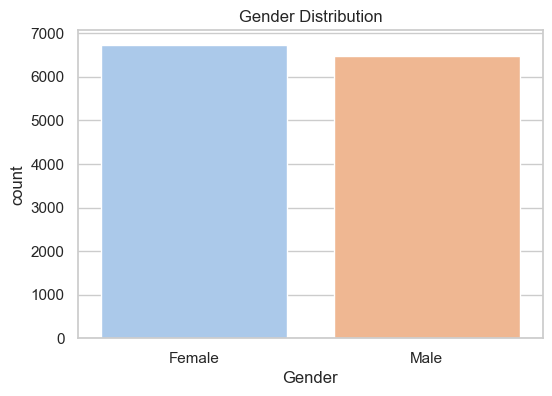

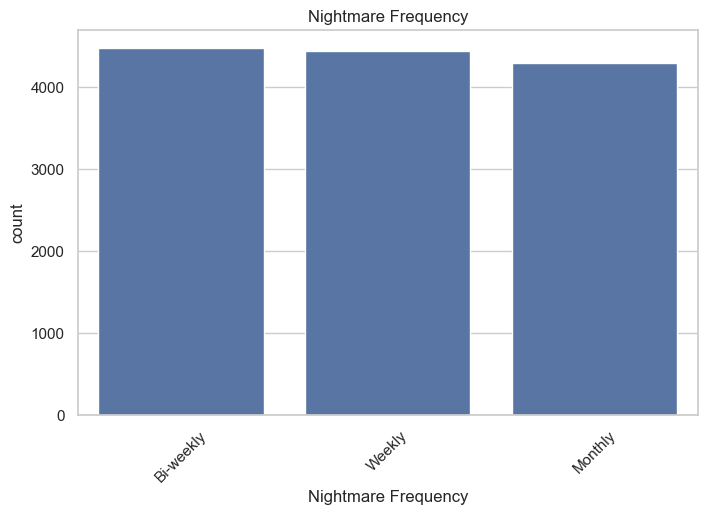

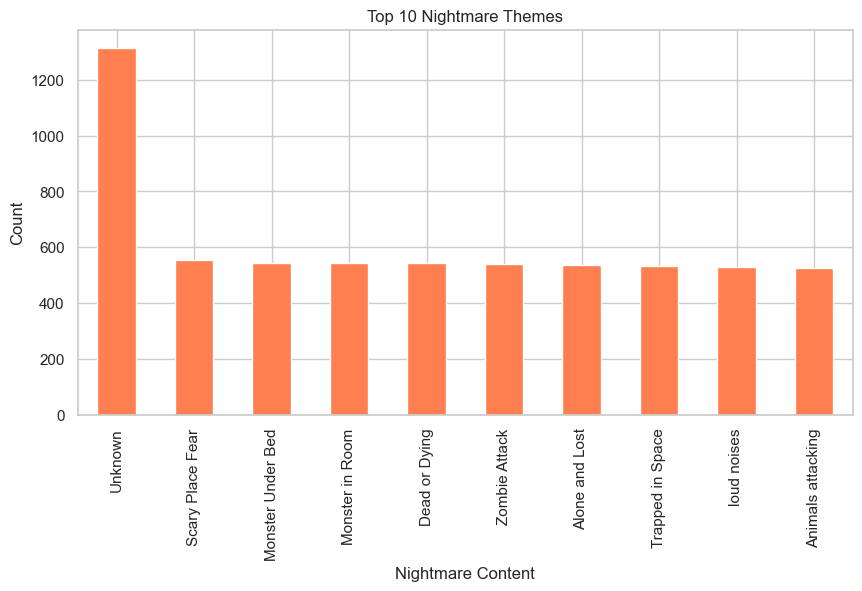

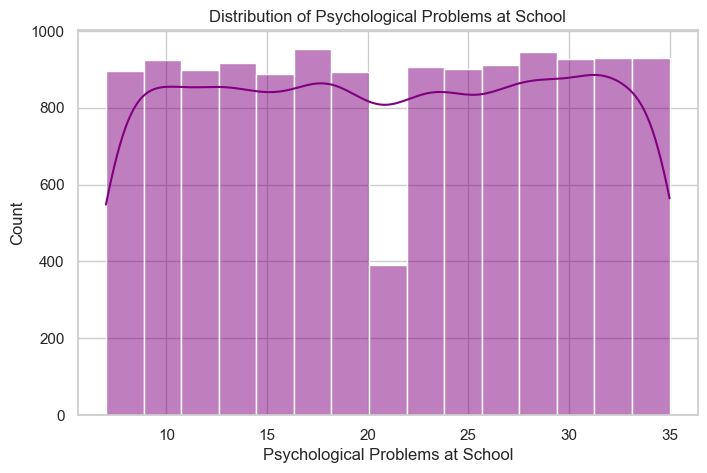

In [19]:
# 5️ Exploratory Data Analysis (EDA)

## Age distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Age Distribution of Children")
plt.show()

## Gender count
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Gender Distribution")
plt.show()

## Nightmare frequency count
plt.figure(figsize=(8,5))
sns.countplot(x='Nightmare Frequency', data=df, order=df['Nightmare Frequency'].value_counts().index)
plt.title("Nightmare Frequency")
plt.xticks(rotation=45)
plt.show()

## Common nightmare contents
plt.figure(figsize=(10,5))
df['Nightmare Content'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title("Top 10 Nightmare Themes")
plt.ylabel("Count")
plt.show()

## Psychological problems distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Psychological Problems at School'], bins=15, kde=True, color='purple')
plt.title("Distribution of Psychological Problems at School")
plt.show()


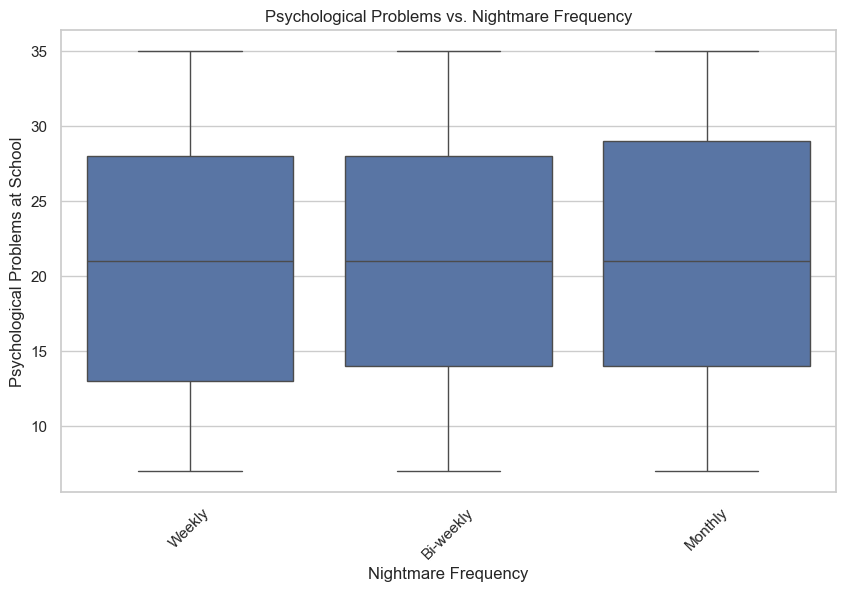

C:\Users\Vanisa\AppData\Local\Temp\ipykernel_24672\1588034532.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Psychological Problems at School', data=df, palette='Set2')


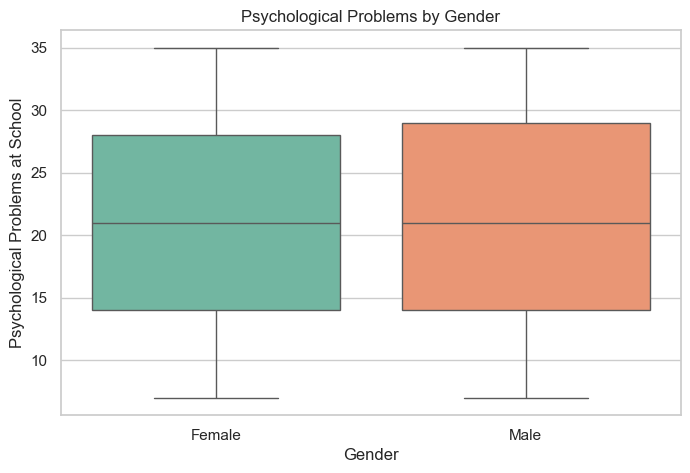

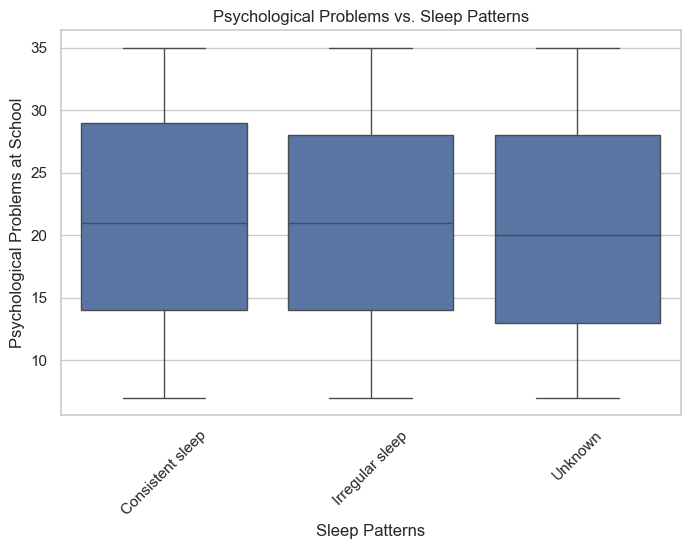

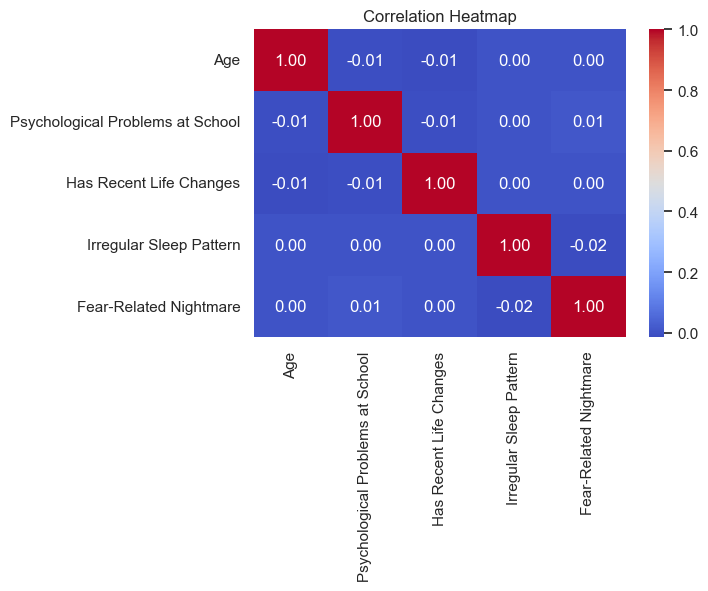

In [20]:
# 6️. Relationships & Patterns

## Boxplot: Psychological problems by nightmare frequency
plt.figure(figsize=(10,6))
sns.boxplot(x='Nightmare Frequency', y='Psychological Problems at School', data=df)
plt.title("Psychological Problems vs. Nightmare Frequency")
plt.xticks(rotation=45)
plt.show()

## Gender vs Psychological Problems
plt.figure(figsize=(8,5))
sns.boxplot(x='Gender', y='Psychological Problems at School', data=df, palette='Set2')
plt.title("Psychological Problems by Gender")
plt.show()

## Effect of sleep pattern
plt.figure(figsize=(8,5))
sns.boxplot(x='Sleep Patterns', y='Psychological Problems at School', data=df)
plt.title("Psychological Problems vs. Sleep Patterns")
plt.xticks(rotation=45)
plt.show()

## Correlation heatmap for numeric columns
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [21]:
# 7️. Grouped Insights

# Average psychological problems by nightmare frequency
nightmare_avg = df.groupby('Nightmare Frequency')['Psychological Problems at School'].mean().sort_values()
print("\nAverage Psychological Problems by Nightmare Frequency:\n", nightmare_avg)

# Average psychological problems by recent life changes
life_changes_avg = df.groupby('Has Recent Life Changes')['Psychological Problems at School'].mean()
print("\nAverage Psychological Problems by Recent Life Changes:\n", life_changes_avg)

# Average psychological problems by irregular sleep
sleep_avg = df.groupby('Irregular Sleep Pattern')['Psychological Problems at School'].mean()
print("\nAverage Psychological Problems by Irregular Sleep:\n", sleep_avg)



Average Psychological Problems by Nightmare Frequency:
 Nightmare Frequency
Weekly       20.928974
Monthly      21.109353
Bi-weekly    21.178587
Name: Psychological Problems at School, dtype: float64

Average Psychological Problems by Recent Life Changes:
 Has Recent Life Changes
0    21.281019
1    21.045664
Name: Psychological Problems at School, dtype: float64

Average Psychological Problems by Irregular Sleep:
 Irregular Sleep Pattern
0    21.062654
1    21.084111
Name: Psychological Problems at School, dtype: float64


Average Psychological Problems by Nightmare Frequency

Weekly nightmares: ~20.93

Monthly nightmares: ~21.11

Bi-weekly nightmares: ~21.18

Interpretation of this findings
There’s very little variation here — psychological problem scores are almost the same regardless of whether nightmares happen weekly, monthly, or bi-weekly. The differences are less than 0.3 points, which is tiny. This suggests nightmare frequency, on its own, may not be a strong predictor of psychological problems in this dataset.

Average Psychological Problems by Recent Life Changes

No recent life changes: ~21.28

Has recent life changes: ~21.05

Interpretationn:
Surprisingly, the average score is slightly lower for those who experienced recent life changes compared to those who haven’t. Again, the difference (~0.23 points) is very small — so life changes, at least as measured here, don’t seem to strongly influence the psychological problem scores.

Average Psychological Problems by Irregular Sleep

Regular sleep: ~21.06

Irregular sleep: ~21.08

Interpretation:
The difference here is almost nonexistent (~0.02 points). This indicates that irregular sleep patterns, in this dataset, are not meaningfully linked to higher psychological problem scores.

Overall takeaway:

All three factors (nightmare frequency, recent life changes, irregular sleep) show minimal differences in average psychological problem scores.

Either these variables truly have little impact, or there may be other hidden factors that are stronger drivers (e.g., family environment, mental health history, socioeconomic status).

The tiny differences could also be due to measurement scale sensitivity — the dataset might not capture enough variation to reveal a real effect.